In [1]:
import praetor.praetor_analysis_rdf as praetor_analysis # package for running sparql queries over the database

recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str
recursive guard _guarded_repr_or_str


# The Analysis Package
For the queries to run, the user interface must be operational. There is a slim version of the UI docker container in the python_extraction directory which can be used. Alternatively, the main user interface docker container, located in the deploy directory, may also be used. In either case, the container is spun up using "docker-compose up"

## Uploading Data
The below function will upload your provenance to the database and return to you the name of the graph to be used in your future queries. The file must be in ttl format. To convert provn files to ttl, use the command - provconvert --infile prov_file.provn --outfile prov_file.ttl - This requires a provtoolbox installation

In [2]:
# prov_file_ttl = '../data/sample_provenance.ttl'
prov_file_ttl = '/home/mj1e16/praetor_singularity/PROV_DATA/praetor_3.6.3_887ad39f-42fd-47ea-95a4-c745044a21c6/flatten_file.ttl'

pipeline_name = praetor_analysis.upload_provenance(prov_file_ttl)

## SPARQL queries

## Activities
Querying all activities

In [3]:
results = praetor_analysis.query_activity(pipeline_name)

In [4]:
results[results['functionSource.value'] == 'main']

activityID.value  duration (s)  \
389   urn:uuid:random_value_69abc5bb-57f1-4f6e-aa59-...         0.111   
630   urn:uuid:random_value_a27daef6-5e79-44dd-b864-...         0.113   
715   urn:uuid:random_value_1591f739-a04b-4349-a0aa-...         0.109   
927   urn:uuid:random_value_6e7b3889-8ba2-4b25-bc3e-...         0.112   
1492  urn:uuid:random_value_1db3c2c0-6b63-496a-9d48-...         0.110   

     functionName.value           startTime.value             endTime.value  \
389        random_value  2024-02-06T14:32:50.539Z   2024-02-06T14:32:50.65Z   
630        random_value  2024-02-06T14:32:50.813Z  2024-02-06T14:32:50.926Z   
715        random_value  2024-02-06T14:32:51.084Z  2024-02-06T14:32:51.193Z   
927        random_value  2024-02-06T14:32:51.619Z  2024-02-06T14:32:51.731Z   
1492       random_value  2024-02-06T14:32:51.352Z  2024-02-06T14:32:51.462Z   

     memory.value functionSource.value  
389    69.3671875                 main  
630   69.40234375                 main  
715   69.40234375                 main  
927   69.43359375                 main  
1492  69.42578125                 main

Querying all activities which were started by another activity

In [5]:
results = praetor_analysis.query_started(pipeline_name)

In [6]:
results

startedBy.value  \
0  urn:uuid:_cleanup_ba59530e-ff55-43ff-87b2-0222...   
1  urn:uuid:call_1277e2bf-97eb-48ac-ab7e-63d91ea0...   
2  urn:uuid:_eintr_retry_call_39624070-6730-47f8-...   
3  urn:uuid:_eintr_retry_call_45067341-150a-440c-...   
4  urn:uuid:_cleanup_89bbeff3-e414-45d4-a0d9-ee05...   
5  urn:uuid:call_8d9494ef-974d-4c25-9e61-553db2cc...   
6  urn:uuid:_eintr_retry_call_417ae797-0bf5-4935-...   
7  urn:uuid:_eintr_retry_call_24c31743-71c5-4274-...   
8  urn:uuid:_cleanup_f1bbf5c9-c3e5-4480-9f43-238b...   

                                       started.value  
0  urn:uuid:_eintr_retry_call_56d0c0a7-536b-4868-...  
1  urn:uuid:sextractor_5925c70a-6920-4066-90ed-20...  
2  urn:uuid:call_1277e2bf-97eb-48ac-ab7e-63d91ea0...  
3  urn:uuid:_eintr_retry_call_39624070-6730-47f8-...  
4  urn:uuid:_eintr_retry_call_45067341-150a-440c-...  
5  urn:uuid:sextractor_0616fca6-182b-4208-a41d-ea...  
6  urn:uuid:call_8d9494ef-974d-4c25-9e61-553db2cc...  
7  urn:uuid:_eintr_retry_call_417ae797-0bf5-4935-...  
8  urn:uuid:_eintr_retry_call_24c31743-71c5-4274-...

Querying activities that started by a specific activity

In [7]:
activity_id = 'call_1277e2bf-97eb-48ac-ab7e-63d91ea0a123' # no need to include the prefix urn:uuid: here
results = praetor_analysis.query_started_individual(pipeline_name, activity_id)

In [8]:
results

a.value
0  urn:uuid:sextractor_5925c70a-6920-4066-90ed-20...

## Inputs
Querying for all inputs to a pipeline 

In [9]:
results = praetor_analysis.query_input(pipeline_name)

In [10]:
results

activityID.value  \
0   urn:uuid:_cleanup_ba59530e-ff55-43ff-87b2-0222...   
1   urn:uuid:_cleanup_ba59530e-ff55-43ff-87b2-0222...   
2   urn:uuid:_cleanup_ba59530e-ff55-43ff-87b2-0222...   
3   urn:uuid:_cleanup_ba59530e-ff55-43ff-87b2-0222...   
4   urn:uuid:_cleanup_ba59530e-ff55-43ff-87b2-0222...   
..                                                ...   
66  urn:uuid:empty_function_ce3d77c4-6027-4ffe-92f...   
67  urn:uuid:empty_function_ce3d77c4-6027-4ffe-92f...   
68  urn:uuid:empty_function_ce3d77c4-6027-4ffe-92f...   
69  urn:uuid:_eintr_retry_call_56d0c0a7-536b-4868-...   
70  urn:uuid:_cleanup_ba59530e-ff55-43ff-87b2-0222...   

                                entityID.value            objectName.value  \
0                   run:globals_PIPE_praetor_1                    run:PIPE   
1              run:globals_mswindows_praetor_1               run:mswindows   
2                run:globals__active_praetor_1                 run:_active   
3              run:globals__has_poll_praetor_1               run:_has_poll   
4              run:globals__PIPE_BUF_praetor_1               run:_PIPE_BUF   
..                                         ...                         ...   
66        run:globals_sextractoryDir_praetor_1          run:sextractoryDir   
67             run:globals_imageName_praetor_1               run:imageName   
68             run:globals_catalogue_praetor_1               run:catalogue   
69  run:_eintr_retry_call_inEntity_0_praetor_5  run:_eintr_retry_call_func   
70                 run:globals_MAXFD_praetor_1                   run:MAXFD   

                                          value.value  
0                                                  -1  
1                                               False  
2                                                  []  
3                                                True  
4                                                4096  
..                                                ...  
66  /home/mj1e16/sextractor/sextractor-master/config/  
67  /home/mj1e16/keplerPhotometry/kplr200911417483...  
68  /home/mj1e16/sextractor/sextractor-master/conf...  
69         callable_<type builtin_function_or_method>  
70                                               1024  

[71 rows x 4 columns]

Querying all inputs which have the same name in python

In [11]:
entity_id = "run:bdsf_imageName" # all ids will be run: followed by the name of the object in python
results = praetor_analysis.query_input_individual(pipeline_name, entity_id)

In [12]:
results

activityID.value  \
0  urn:uuid:bdsf_7e7e56f2-34b7-4f5e-aa79-6a10e15f...   
1  urn:uuid:bdsf_57e05945-d3ab-437a-949b-94558837...   

                           entityID.value  \
0  run:globals_fourierImageName_praetor_1   
1         run:globals_imageName_praetor_1   

                                         value.value  
0          /home/mj1e16/simpleExample/keplerFFT.fits  
1  /home/mj1e16/keplerPhotometry/kplr200911417483...

## Outputs
Querying for all outputs

In [13]:
results = praetor_analysis.query_output(pipeline_name)

Querying all outputs created by the same function

In [14]:
activity = '"generateHistogram"' # all activity ids are u2p: plus the name of the function in python
results = praetor_analysis.query_output_individual(pipeline_name, activity)

In [15]:
results

activityID.value  \
0  urn:uuid:generateHistogram_f4ca6ec3-9574-41c8-...   
1  urn:uuid:generateHistogram_c5920e83-d14f-4ec6-...   
2  urn:uuid:generateHistogram_14a2e0fa-5e97-4ed4-...   
3  urn:uuid:generateHistogram_5a9d0b17-1f07-43fd-...   

                                entityID.value              value.value  
0  run:generateHistogram_outEntity_0_praetor_4        bdsf_fft_hist.png  
1  run:generateHistogram_outEntity_0_praetor_1      sextractor_hist.png  
2  run:generateHistogram_outEntity_0_praetor_2            bdsf_hist.png  
3  run:generateHistogram_outEntity_0_praetor_3  sextractor_fft_hist.png

## Histograms

Function to create histograms for whatever object you give it.

The function takes as input:

prov_file_list - list of provenance files to upload and query

object_name - name of the object to query (either the name of a function or the name of a function followed by an _ and the name of an input to that function)

object_type - set to 'activity' if naming a function or 'entity' if naming an input

The function will produce histograms of the values of inputs if an entity is passed. If a function is passed, then it will produce histograms showing the distribution of duration, memory usage, and output values. The data which form these are returned as a dataframe

In [20]:
#prov_file_list = ['/home/mj1e16/ef_testing/praetor_0.1_717fecbd-a154-43bb-ab5e-f21723c2f2bf/flatten_file.ttl', '/home/mj1e16/ef_testing/praetor_0.1_717fecbd-a154-43bb-ab5e-f21723c2f2bf/flatten_file.ttl']
prov_file_list = ['../data/sample_provenance.ttl', '../data/sample_provenance.ttl']

entity_name = 'run:sextractor_imageName'
activity_name = 'generateHistogram'

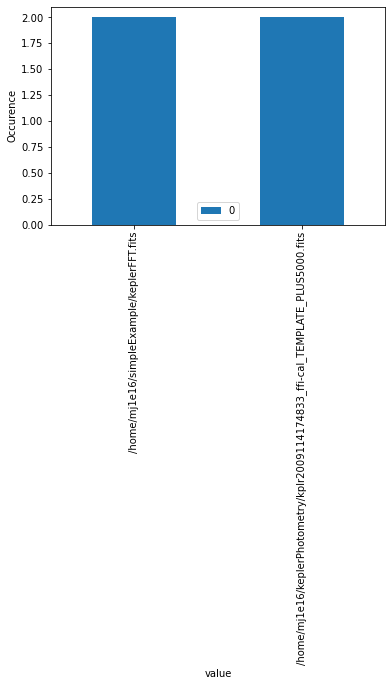

In [21]:
ent = praetor_analysis.object_histogram(prov_file_list, entity_name, 'entity')

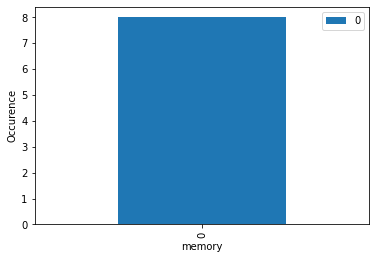

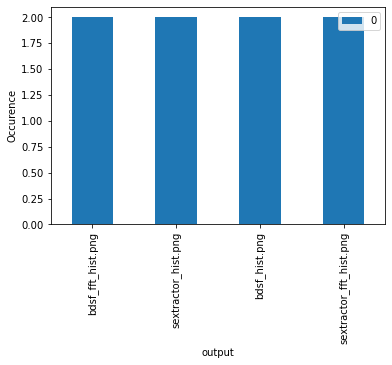

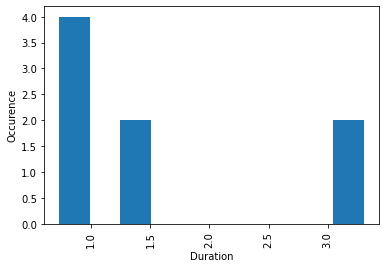

In [22]:
act = praetor_analysis.object_histogram(prov_file_list, activity_name, 'activity')

# The output

The ouput from each query is in the form of lists, where each item represents a row and the columns within are divided by commas. 

Returning the type of quality is not yet implemented, will do when I get back

# Additional Options

The praetor_analysis package contains more functions than those listed here. All work in the same manor I just did not have time to doc string and make a tutorial for each. 

Also, the README on the gitlab for this repository describes a python script for extracting all information from a provenance file and depositing it into a csv. Finally, for extracting histograms of input parameters 

In [23]:
resources = praetor_analysis.query_resources_used(pipeline_name) # total resources used

In [24]:
resources

{'total_time_s': 10.113999999999999, 'total_memory_MB': 0.0}

In [25]:
module = '"main"'

prefixes = '''

        PREFIX prov: <http://www.w3.org/ns/prov#>
        PREFIX run: <http://example.org/>
        PREFIX exe: <http://example.org/>
        PREFIX prtr: <https://praetor.pages.mpcdf.de/praetor_provenance/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

'''

query = '''       
        
         
         SELECT ?a ?an
         FROM NAMED <''' + pipeline_name + '''>

         WHERE {
         GRAPH ?g {

         ?a a prov:Activity .
         ?a prtr:activityName ?an .
         ?a prtr:activitySource ''' + module + ''' .
         }
         }

         '''

In [26]:
user_def = praetor_analysis.user_defined_query(prefixes + query)

['{ "head": {\n    "vars": [ "a" , "an" ]\n  } ,\n  "results": {\n    "bindings": [\n      { \n        "a": { "type": "uri" , "value": "urn:uuid:empty_function_ce3d77c4-6027-4ffe-92fd-f7fd4f184191" } ,\n        "an": { "type": "literal" , "value": "empty_function" }\n      } ,\n      { \n        "a": { "type": "uri" , "value": "urn:uuid:bdsf_7e7e56f2-34b7-4f5e-aa79-6a10e15f6b76" } ,\n        "an": { "type": "literal" , "value": "bdsf" }\n      } ,\n      { \n        "a": { "type": "uri" , "value": "urn:uuid:generateHistogram_f4ca6ec3-9574-41c8-b0da-98e1122f4705" } ,\n        "an": { "type": "literal" , "value": "generateHistogram" }\n      } ,\n      { \n        "a": { "type": "uri" , "value": "urn:uuid:generateHistogram_c5920e83-d14f-4ec6-8e8e-dd7cc12948a6" } ,\n        "an": { "type": "literal" , "value": "generateHistogram" }\n      } ,\n      { \n        "a": { "type": "uri" , "value": "urn:uuid:fourierTransform_27098170-39d7-4e93-bcd8-624d469622ae" } ,\n        "an": { "type": "li

In [27]:
user_def

a.value                 an.value
0   urn:uuid:empty_function_ce3d77c4-6027-4ffe-92f...           empty_function
1   urn:uuid:bdsf_7e7e56f2-34b7-4f5e-aa79-6a10e15f...                     bdsf
2   urn:uuid:generateHistogram_f4ca6ec3-9574-41c8-...        generateHistogram
3   urn:uuid:generateHistogram_c5920e83-d14f-4ec6-...        generateHistogram
4   urn:uuid:fourierTransform_27098170-39d7-4e93-b...         fourierTransform
5   urn:uuid:pythonBuiltinFileAccess_e8805517-22a3...  pythonBuiltinFileAccess
6   urn:uuid:generateHistogram_14a2e0fa-5e97-4ed4-...        generateHistogram
7   urn:uuid:generateHistogram_5a9d0b17-1f07-43fd-...        generateHistogram
8   urn:uuid:function_72d12ad3-5d11-4487-a635-02db...                 function
9   urn:uuid:sextractor_0616fca6-182b-4208-a41d-ea...               sextractor
10  urn:uuid:bdsf_57e05945-d3ab-437a-949b-94558837...                     bdsf
11  urn:uuid:sextractor_5925c70a-6920-4066-90ed-20...               sextractor

# Looking n steps forward/backward in your provenance

To help users get a deeper unstanding of the chronological order of their pipeline, the following functions enable them to determine a start/end point and find the n next/previous objects connected to their starting point. Note that the provenance (in ttl format) relies upon blank nodes to connect various objects, so values such as b0, b1, ... bx, can be ignore as blank nodes which do not represent anything physical in the provenance. If desired, these columns can be filtered out using regular pandas operations post query. They are however, left in for completeness.

In [30]:
prov_file_ttl = '../data/example_search_prov_fkjkaksfJSJN.ttl'
pipeline_name = praetor_analysis.upload_provenance(prov_file_ttl)

Any activity or entity can be used as a starting point, all that is required is the if of the object. The following code shows examples of both, searching for 3 connections backwards and forwards

In [31]:
entity_id = 'exe:add_group_permissions_inEntity_0_praetor_4'

In [32]:
result = praetor_analysis.forward_search(pipeline_name, entity_id, 3)

In [33]:
result

Empty DataFrame
Columns: []
Index: []

In [34]:
result = praetor_analysis.backward_search(pipeline_name, entity_id, 3)

In [37]:
result

node0.value                                        node1.value node2.value  \
0          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b1   
1          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b1   
2          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b1   
3          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b2   
4          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b2   
5          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b2   
6          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b3   
7          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b3   

                                         node3.value  
0                                         prov:Usage  
1     run:add_group_permissions_inEntity_0_praetor_4  
2                       run:add_group_permissions_fn  
3                                         prov:Usage  
4     run:add_group_permissions_inEntity_1_praetor_1  
5                    run:add_group_permissions_perms  
6                                         prov:Start  
7  urn:uuid:make_polprofile_plots_e9ef0b81-d9d9-4...

In [38]:
activity_id = 'urn_uuid:add_group_permissions_5d55da9f-3ef8-4eff-8848-694928383ef4'

In [39]:
result = praetor_analysis.forward_search(pipeline_name, activity_id, 3)

In [40]:
result

node0.value                                        node1.value node2.value  \
0          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b1   
1          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b1   
2          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b1   
3          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b2   
4          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b2   
5          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b2   
6          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b3   
7          b0  urn:uuid:add_group_permissions_6c71598b-81fc-4...          b3   

                                         node3.value  
0                                         prov:Usage  
1     run:add_group_permissions_inEntity_0_praetor_4  
2                       run:add_group_permissions_fn  
3                                         prov:Usage  
4     run:add_group_permissions_inEntity_1_praetor_1  
5                    run:add_group_permissions_perms  
6                                         prov:Start  
7  urn:uuid:make_polprofile_plots_e9ef0b81-d9d9-4...

In [41]:
result = praetor_analysis.backward_search(pipeline_name, activity_id, 3)

In [42]:
result

node0.value  \
0      urn:uuid:praetor_0.1_6a52fa9f-ac3e-4841-9bfd-4...   
4                                                     b0   
7                                                     b1   
10                                                    b2   
12     urn:uuid:praetor_0.1_6a52fa9f-ac3e-4841-9bfd-4...   
...                                                  ...   
10026  urn:uuid:praetor_0.1_6a52fa9f-ac3e-4841-9bfd-4...   
10030                                               b371   
10033                                               b372   
10036                                               b373   
10038  urn:uuid:praetor_0.1_6a52fa9f-ac3e-4841-9bfd-4...   

                                             node1.value  \
0      urn:uuid:prioritize_pulsar_8a415aa3-a108-4251-...   
4      urn:uuid:prioritize_pulsar_8a415aa3-a108-4251-...   
7      urn:uuid:prioritize_pulsar_8a415aa3-a108-4251-...   
10     urn:uuid:prioritize_pulsar_8a415aa3-a108-4251-...   
12     urn:uuid:prioritize_pulsar_4dc7eb3d-4b9c-4d8b-...   
...                                                  ...   
10026  urn:uuid:print_info_ab1a765c-a88e-4e2b-9b12-da...   
10030  urn:uuid:print_info_ab1a765c-a88e-4e2b-9b12-da...   
10033  urn:uuid:print_info_ab1a765c-a88e-4e2b-9b12-da...   
10036  urn:uuid:print_info_ab1a765c-a88e-4e2b-9b12-da...   
10038  urn:uuid:exit_handler_fa73f826-f98b-499c-ba56-...   

                                        node2.value  
0      run:prioritize_pulsar_outEntity_0_praetor_11  
4      run:prioritize_pulsar_outEntity_0_praetor_11  
7      run:prioritize_pulsar_outEntity_0_praetor_11  
10     run:prioritize_pulsar_outEntity_0_praetor_11  
12     run:prioritize_pulsar_outEntity_0_praetor_12  
...                                             ...  
10026                                          b133  
10030                                          b133  
10033                                          b133  
10036                                          b133  
10038                                          b373  

[2755 rows x 3 columns]

For large datasets, there can be many rows. To reduce these, the duplicates caused by blank nodes can be removed as follows

In [43]:
result_new = result.replace('^.*b.*$', 'b', regex=True)

In [44]:
result_new = result_new.drop_duplicates()

In [45]:
result_new

node0.value                                        node1.value  \
0              b                                                  b   
12             b                                                  b   
24             b                                                  b   
33             b                                                  b   
45             b                                                  b   
...          ...                                                ...   
8723           b  urn:uuid:extract_parfile_d6c87c3d-9d38-44c2-90...   
8747           b  urn:uuid:is_gitrepo_dirty_5dd678fd-6a55-4ef3-a...   
9288           b  urn:uuid:get_todo_d492f00c-6f2a-49f1-a212-ffa0...   
9675           b  urn:uuid:print_info_9f5923ce-099c-4ec4-8d08-e0...   
9948           b  urn:uuid:get_prefname_a232c486-0c11-452a-8101-...   

                                       node2.value  
0     run:prioritize_pulsar_outEntity_0_praetor_11  
12    run:prioritize_pulsar_outEntity_0_praetor_12  
24            run:is_gitrepo_outEntity_0_praetor_1  
33    run:prioritize_pulsar_outEntity_0_praetor_10  
45     run:prioritize_pulsar_outEntity_0_praetor_1  
...                                            ...  
8723                                             b  
8747                                             b  
9288                                             b  
9675                                             b  
9948                                             b  

[216 rows x 3 columns]